# Titanic Survival Logistic Regression Project

In [291]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [292]:
df = pd.read_csv('titanic.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [293]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [294]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [295]:
df.dropna(axis = 1, how='any')

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0


In [296]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [297]:
df.drop(columns=['zero', 'zero.1', 'zero.2',
       'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8',
       'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14',
       'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18'], inplace=True)

In [298]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,2urvived
0,1,22.0,7.2500,0,1,0
1,2,38.0,71.2833,1,1,1
2,3,26.0,7.9250,1,0,1
3,4,35.0,53.1000,1,1,1
4,5,35.0,8.0500,0,0,0


In [299]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', '2urvived'], dtype='object')

In [300]:
x = df[['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp']]
y = df['2urvived']

In [301]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [302]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [303]:
y_test

1148    0
1049    0
982     0
808     0
1195    0
       ..
325     1
919     0
532     0
1159    0
513     1
Name: 2urvived, Length: 393, dtype: int64

In [304]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [305]:
predict = model.predict(X_test)
residuals = y_test - predict

In [306]:
predict

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [307]:
model.coef_

array([[-0.0027274 , -0.01623888,  0.00843812,  2.04857523, -0.39282305]])

In [308]:
model.intercept_

array([-0.02524127])

In [309]:
cm = pd.DataFrame(model.coef_[0], x.columns, columns=['Coefficient'])
it = pd.DataFrame(model.intercept_, index=[y.name], columns=['Intercept'])
print(cm)
print(it)

             Coefficient
Passengerid    -0.002727
Age            -0.016239
Fare            0.008438
Sex             2.048575
sibsp          -0.392823
          Intercept
2urvived  -0.025241


In [310]:
import sklearn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [311]:
print("Accuracy Score is: ", accuracy_score(y_test, predict))
print("Classification Report: ", classification_report(y_test, predict))

Accuracy Score is:  0.8346055979643766
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.94      0.89       285
           1       0.79      0.55      0.64       108

    accuracy                           0.83       393
   macro avg       0.82      0.75      0.77       393
weighted avg       0.83      0.83      0.82       393



In [312]:
print("Confusion Matrix is: ", confusion_matrix(y_test, predict))
cm = confusion_matrix(y_test, predict)

Confusion Matrix is:  [[269  16]
 [ 49  59]]


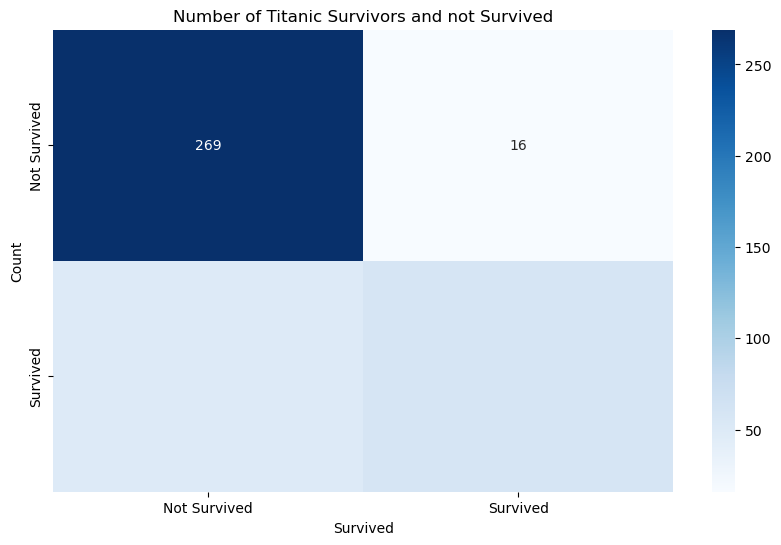

In [313]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= ['Not Survived', 'Survived'], yticklabels = ['Not Survived', 'Survived'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Number of Titanic Survivors and not Survived')
plt.show()

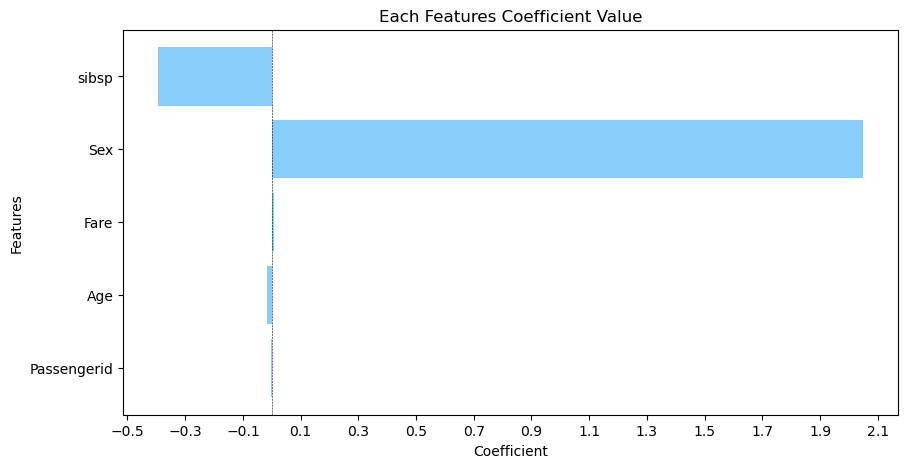

In [314]:
# Building a barplot of each coefficient value
coef = model.coef_[0]
features = x.columns
plt.figure(figsize=(10,5))
plt.barh(features, coef, color='lightskyblue')
plt.axvline(0, color='black', linestyle='--', linewidth='0.4')
plt.xticks(np.arange(-0.5,2.2,0.2))
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Each Features Coefficient Value')
plt.show()

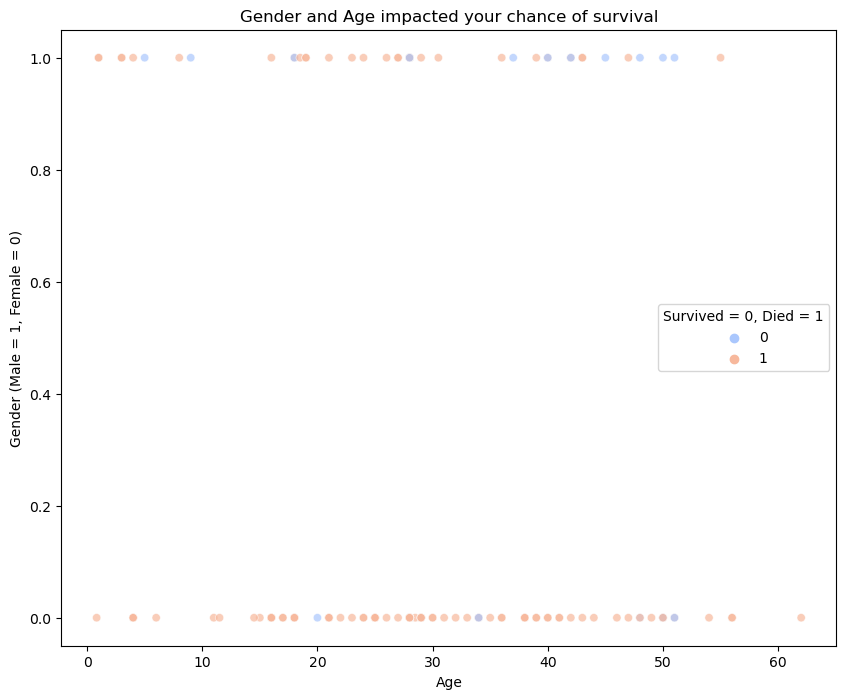

In [315]:
# plotting random data points
sample_data = X_test.assign(correct=(predict==y_test).astype(int),Survived=y_test)
random_data = sample_data.sample(n=150, random_state=42)
plt.figure(figsize=(10,8))
sns.scatterplot(data=random_data, x='Age', y='Sex', hue='correct', palette='coolwarm', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Gender (Male = 1, Female = 0)')
plt.title('Gender and Age impacted your chance of survival')
plt.legend(title='Survived = 0, Died = 1')
plt.show()

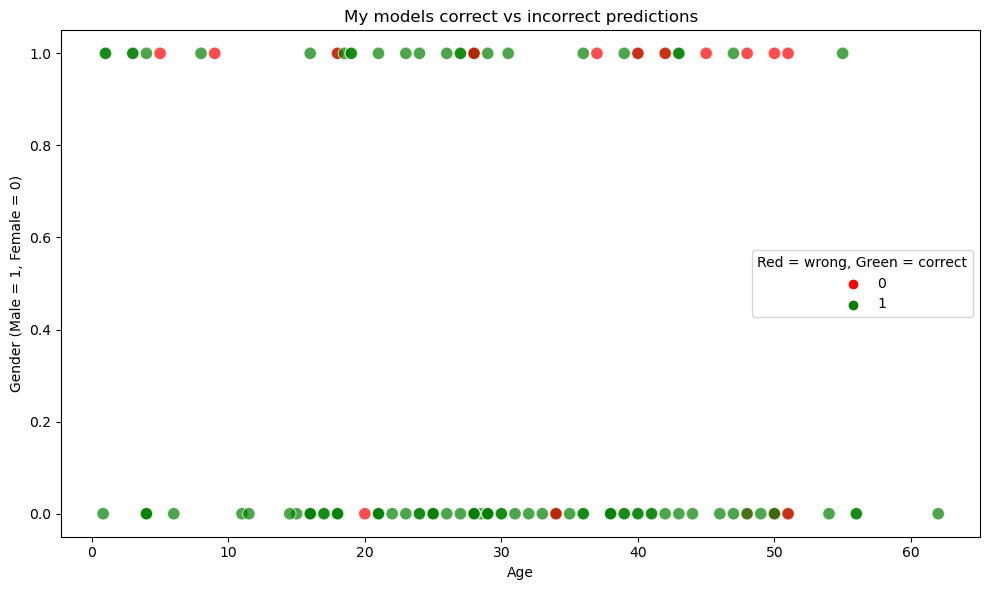

In [316]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=random_data, x='Age', y='Sex', hue='correct', palette={1: 'Green', 0: 'Red'}, alpha=0.7, s=80)
plt.xlabel('Age')
plt.ylabel('Gender (Male = 1, Female = 0)')
plt.title('My models correct vs incorrect predictions')
plt.legend(title='Red = wrong, Green = correct')
plt.tight_layout()
plt.show()

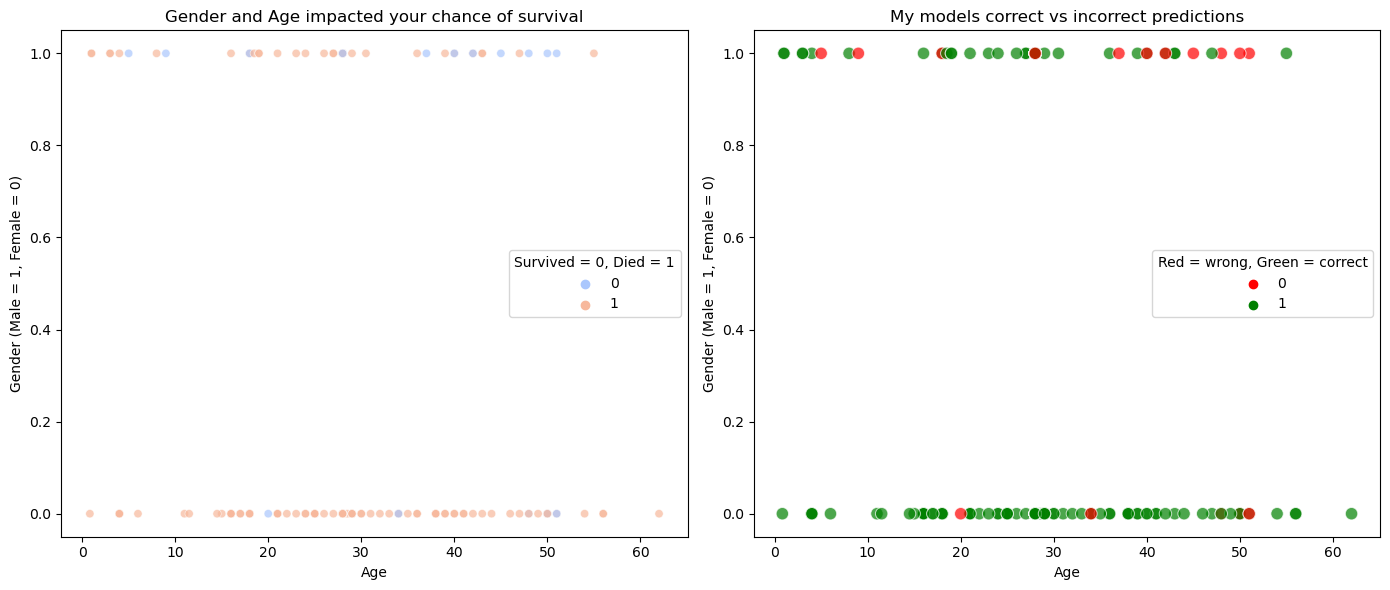

In [317]:
# Seeing side by side what my model got correct and incorrect to see any pattern
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(data=random_data, x='Age', y='Sex', hue='correct', palette='coolwarm', alpha=0.7, ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Gender (Male = 1, Female = 0)')
axes[0].set_title('Gender and Age impacted your chance of survival')
axes[0].legend(title='Survived = 0, Died = 1')

sns.scatterplot(data=random_data, x='Age', y='Sex', hue='correct', palette={1: 'Green', 0: 'Red'}, alpha=0.7, s=80, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Gender (Male = 1, Female = 0)')
axes[1].set_title('My models correct vs incorrect predictions')
axes[1].legend(title='Red = wrong, Green = correct')
plt.tight_layout()
plt.show()

### For this Titanic Data Set I did a standard logistic regression model with showing my findings in a heat map, bar graph, a scatter plot of the survived and not survivors, a graph of my models correct vs incorrect predictions, and did a side-by-side of the survived and not survived graph based on age and gender on one side with my models correct and incorrect predictions on the other side.